In [1]:
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [5]:
data =keras.utils.get_file("auto-mpg.data","http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
data

'C:\\Users\\Sujay J\\.keras\\datasets\\auto-mpg.data'

In [6]:
column=['MPG','Cylinders','Displacement','Horsepower','weight','acceleration','model year','origin']
raw_data = pd.read_csv(data,names = column,na_values= "?",comment ='\t',sep=" ",skipinitialspace=True)

dataset = raw_data.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [7]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [8]:
dataset=dataset.dropna()

In [9]:
dataset['origin']=dataset['origin'].map({1:'USA',2:'Europe',3:'Japan'})
dataset.head(10)

,MPG,Cylinders,Displacement,Horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
5,15.0,8,429.0,198.0,4341.0,10.0,70,USA
6,14.0,8,454.0,220.0,4354.0,9.0,70,USA
7,14.0,8,440.0,215.0,4312.0,8.5,70,USA
8,14.0,8,455.0,225.0,4425.0,10.0,70,USA
9,15.0,8,390.0,190.0,3850.0,8.5,70,USA


In [10]:
dataset=pd.get_dummies(dataset,prefix='',prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,weight,acceleration,model year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [11]:
train = dataset.sample(frac=0.8,random_state=0)
test = dataset.drop(train.index)

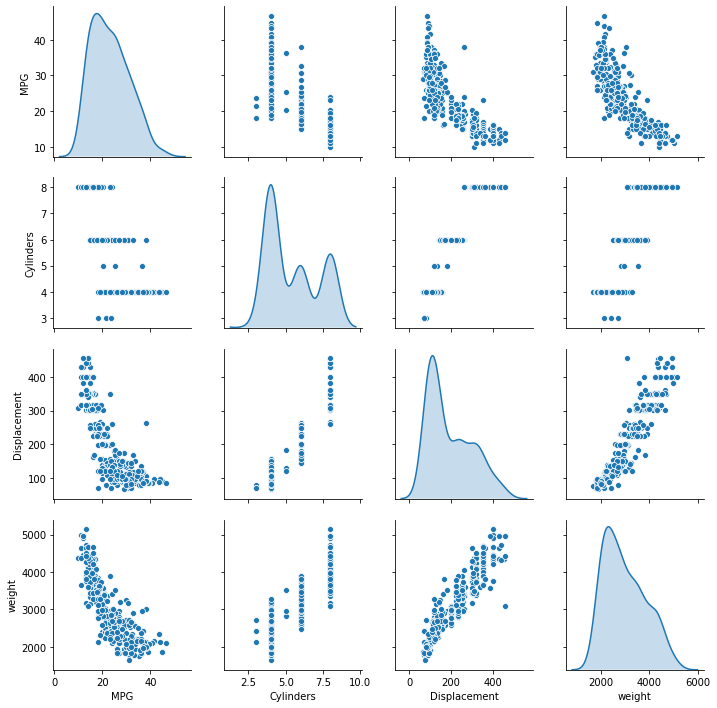

In [12]:
sns.pairplot(train[["MPG","Cylinders","Displacement","weight"]],diag_kind='kde')

In [13]:
train_stats = train.describe()
train_stats.pop("MPG")
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [14]:
train_labels = train.pop('MPG')
test_labels = test.pop('MPG')

In [15]:
def norm(x):
    return(x-train_stats['mean'])/train_stats['std']
normed_train = norm(train)
normed_test = norm(test)

In [16]:
normed_train

,Cylinders,Displacement,Horsepower,weight,acceleration,model year,Europe,Japan,USA
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,-0.465148,-0.495225,0.774676
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,-0.465148,-0.495225,0.774676
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,-0.465148,-0.495225,0.774676
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,-0.465148,-0.495225,0.774676
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-0.465148,2.012852,-1.286751
...,...,...,...,...,...,...,...,...,...
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,-0.465148,-0.495225,0.774676
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,-0.465148,-0.495225,0.774676
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-0.465148,2.012852,-1.286751
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-0.465148,2.012852,-1.286751


In [17]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation = 'relu',input_shape=[len(train.keys())]),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',optimizer=optimizer,metrics = ['mae','mse'])
    return model

In [18]:
model = build_model()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [20]:
example_batch = normed_train[:10]

In [21]:
example_result = model.predict(example_batch)

In [22]:
example_result

array([[-0.0309314 ],
       [ 0.21020207],
       [-0.3691333 ],
       [ 0.0875545 ],
       [ 0.4394294 ],
       [ 0.03047709],
       [ 0.4297309 ],
       [ 0.30881086],
       [-0.03633448],
       [-0.05283472]], dtype=float32)

In [23]:
EPOCHS = 1000
history = model.fit(normed_train,train_labels,epochs=EPOCHS,validation_split=0.2,verbose=0,callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:570.2548,  mae:22.6867,  mse:570.2549,  val_loss:566.2444,  val_mae:22.5971,  val_mse:566.2444,  
....................................................................................................
Epoch: 100, loss:6.1291,  mae:1.7151,  mse:6.1291,  val_loss:7.9760,  val_mae:2.1423,  val_mse:7.9760,  
....................................................................................................
Epoch: 200, loss:5.2471,  mae:1.5589,  mse:5.2471,  val_loss:8.0100,  val_mae:2.1670,  val_mse:8.0100,  
....................................................................................................
Epoch: 300, loss:4.6138,  mae:1.4531,  mse:4.6138,  val_loss:7.9163,  val_mae:2.1802,  val_mse:7.9163,  
....................................................................................................
Epoch: 400, loss:4.2685,  mae:1.3487,  mse:4.2685,  val_loss:8.2154,  val_mae:2.2255,  val_mse:8.2154,  
..............................................................

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.310209,0.949921,2.310208,9.845411,2.414678,9.845411,995
996,2.369854,0.988512,2.369853,9.983353,2.473659,9.983352,996
997,2.316808,0.951550,2.316808,9.640812,2.375667,9.640811,997
998,2.509122,1.029152,2.509122,9.809273,2.434511,9.809274,998
999,2.447219,0.992732,2.447219,9.738298,2.389669,9.738298,999


In [26]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE[MPG]')

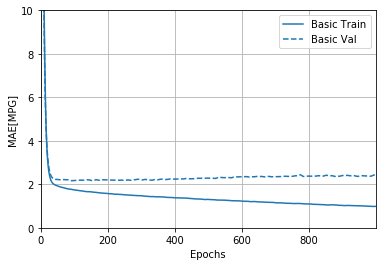

In [27]:
plotter.plot({'Basic':history},metric = 'mae')
plt.ylim([0,10])
plt.ylabel('MAE[MPG]')

Text(0, 0.5, 'MSE[MPG]')

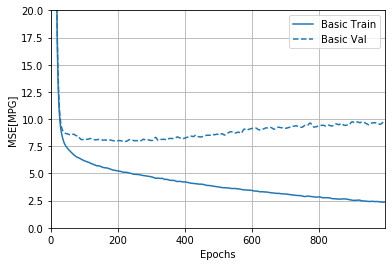

In [29]:
plotter.plot({'Basic':history},metric = 'mse')
plt.ylim([0,20])
plt.ylabel('MSE[MPG]')

In [31]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])




Epoch: 0, loss:570.5926,  mae:22.5940,  mse:570.5926,  val_loss:570.0874,  val_mae:22.5696,  val_mse:570.0874,  
...................................................

Text(0, 0.5, 'MAE [MPG]')

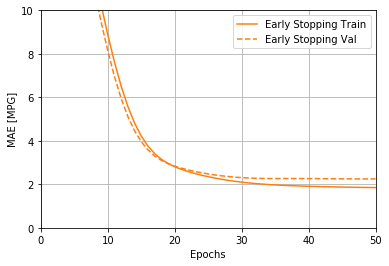

In [32]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [33]:
loss, mae, mse = model.evaluate(normed_test, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 5.7188 - mae: 1.7932 - mse: 5.7188
Testing set Mean Abs Error:  1.79 MPG


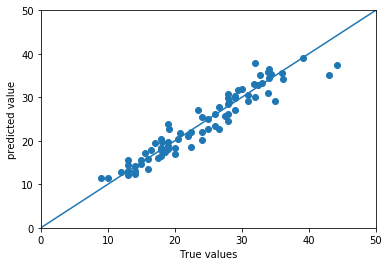

In [34]:
test_predict = model.predict(normed_test).flatten()
a=plt.axis(aspect = 'equal')
plt.scatter(test_labels,test_predict)
plt.xlabel('True values')
plt.ylabel('predicted value')
lims=[0,50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims)

Text(0, 0.5, 'count')

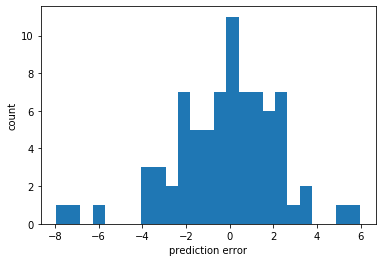

In [35]:
error = test_predict-test_labels
plt.hist(error,bins=25)
plt.xlabel("prediction error")
plt.ylabel("count")
